# Visualizing Poverty Tweets and Word Cloud analysis
Author : Prajakta Gaydhani 

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

## 1. Read Poverty Dataset with sentiment analysis

In [2]:
data = pd.read_csv("Sentiment_Twitter_Poverty.csv", parse_dates=["Date"])
data.drop(columns = ['Unnamed: 0'], inplace = True)
data.head()

,Date,Review,Sentiment
0,2018-09-30 19:39:00,growing food faith impoverished brazil ben dem...,0
1,2018-09-30 19:37:00,yrs vietnam poverty emerging market ans oi moi...,-1
2,2018-09-30 19:37:00,politics poverty officials grapple works doesn...,-1
3,2018-09-30 19:29:00,talking kenyalendahand kenya nairobi kibera ja...,-1
4,2018-09-30 19:24:00,raiders poverty,-1


## 2. Visulizing Positive, Negative, and Neutral Povert Tweets

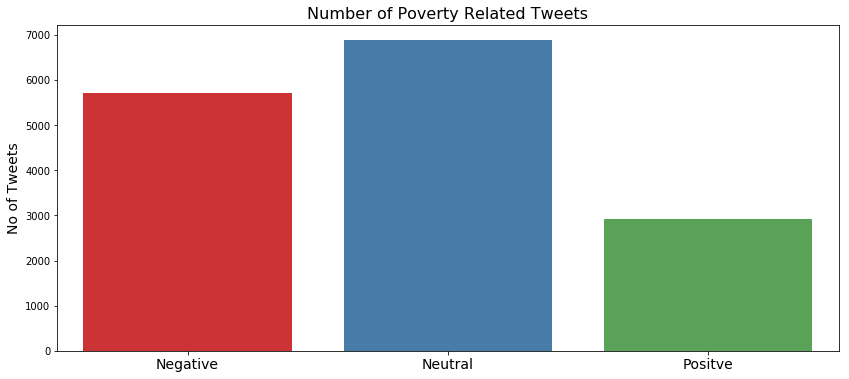

In [93]:
#Tweet Count
plt.figure(figsize = (14,6))
g = sns.countplot(x= 'Sentiment', data = data, palette="Set1")
plt.xticks([0,1,2], ["Negative","Neutral", "Positve"], fontsize = 14);
plt.ylabel("No of Tweets", fontsize = 14)
plt.xlabel("")
plt.title("Number of Poverty Related Tweets", fontsize = 16)

groupedvalues = data.groupby('Sentiment').count()   
#plt.savefig('countplot_united.png', bbox_inches='tight')

## 3. Word Cloud Analysis

### 3.1. Word Cloud for Negative Poverty Tweets

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [94]:
#get all the negative tweets from the dataset
neg_tweets = data[data.Sentiment == -1]
neg_string = []
for t in neg_tweets.Review:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

In [95]:
#update the list of stop words
stopwords = set(STOPWORDS)
stopwords.update(["usa", "canada", "uk", "australia", "newzealand", "europe", "poverty", "ev", "christians", "christianity", "news",
                 "goverment", "politics news", "politics news", "christians christianity", "gop capitalism","capitalism socialism",
                 "gop", "capitalism", "took advantage", "socialism america", "socialism", "america","vital", "insights", "circle", "personnal"
                  ,"whats", "really", 
])

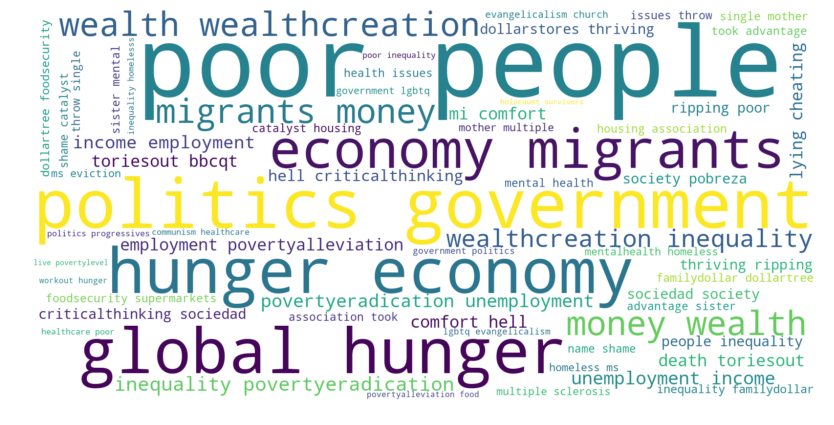

In [97]:
#Visulize the negative words in poverty tweets
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, max_words = 62, stopwords = stopwords, background_color='white').generate(neg_string)
#print(wordcloud.words_)
plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.savefig('neg_wordcloud.png', bbox_inches='tight')
plt.show();


## 3.2.  Top 10 most frequently occuring words in negative poverty tweets

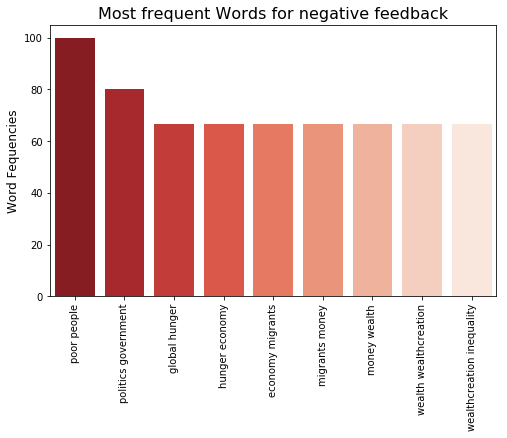

In [58]:
plt.figure(figsize = (8,5))
yaxis = list(wordcloud.words_.values())[0:9]
yaxis = [y * 100 for y in yaxis]
ax = sns.barplot(x=list(wordcloud.words_.keys())[0:9], y=yaxis, palette = "Reds_r")
plt.xticks([0,1,2,3,4,5,6,7,8], rotation = 90)
plt.xticks([0,1,2,3,4,5,6,7,8],["Worst Flight","Customer Service", "Passenger", 
"Airline Suck", "Flight Attendent", "Flight Delay", "Bad Seat", "Worst Airport", "Failed"], rotation = 90);
plt.title("Most frequent Words for negative feedback", fontsize = 16)
plt.ylabel("Word Fequencies", fontsize = 12);
#plt.savefig('neg_freq_united.png', bbox_inches='tight')

## 3.3.  Word Cloud for Positive Poverty Tweets

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [74]:
#get all the positive tweets from dataset
pos_tweets = data[data.Sentiment == 1]
pos_string = []
for t in pos_tweets.Review:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

In [80]:
#update the list of stopwords
stopwords_pos = set(STOPWORDS)
stopwords_pos.update(["please", "retweet", "people", "know","varieties", "poverty" ])
# #print(len(stopwords))

{'flattaxrate every': 1.0, 'every dollar': 1.0, 'dollar povertylevel': 1.0, 'happy wealth': 0.6868131868131868, 'wealth neither': 0.6868131868131868, 'neither money': 0.6868131868131868, 'money possessions': 0.6868131868131868, 'possessions consumerism': 0.6868131868131868, 'consumerism knowing': 0.6868131868131868, 'knowing difference': 0.6868131868131868, 'difference heaven': 0.6868131868131868, 'heaven hell': 0.6868131868131868, 'hell paradise': 0.6868131868131868, 'paradise purgatory': 0.6868131868131868, 'purgatory wholeness': 0.6868131868131868, 'wholeness gained': 0.6868131868131868, 'gained consciousness': 0.6868131868131868, 'helping veterans': 0.6868131868131868, 'veterans love': 0.6868131868131868, 'love homeless': 0.6868131868131868, 'homeless veterans': 0.6868131868131868, 'veterans disabled': 0.6868131868131868, 'disabled homeless': 0.6868131868131868, 'homeless work': 0.6868131868131868, 'work veterans': 0.6868131868131868, 'veterans need': 0.6868131868131868, 'need good

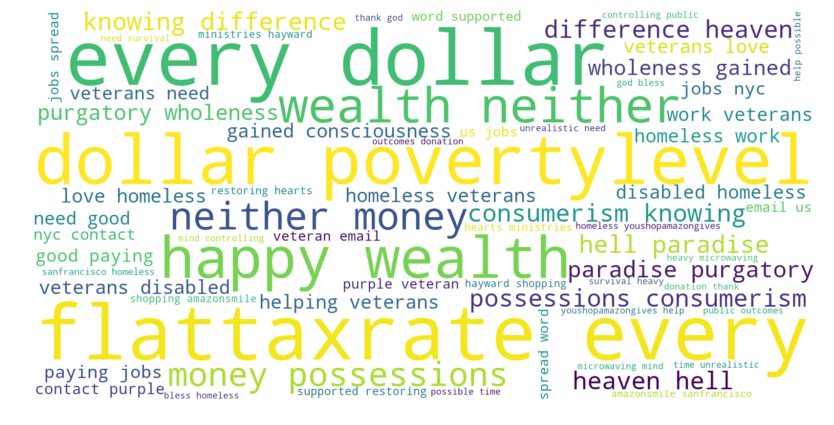

In [98]:
#visulize the word-cloud for positive words
wordcloud_pos = WordCloud(width=1600, height=800,max_font_size=200, max_words = 65,stopwords = stopwords_pos,background_color='white').generate(pos_string)
print(wordcloud_pos.words_)
plt.figure(figsize=(14,10))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
#plt.savefig('pos_word.png', bbox_inches='tight')
plt.show();


## 3.4.  Top 10 most frequently occuring words in positive poverty tweets

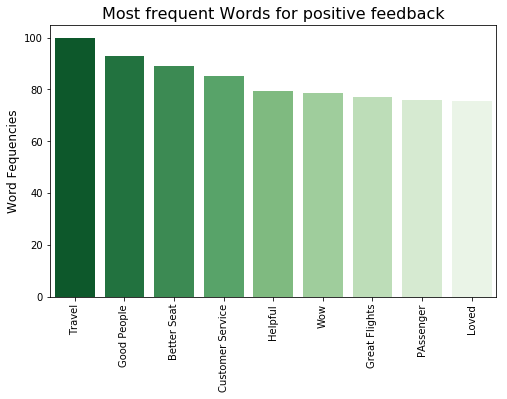

In [82]:
plt.figure(figsize = (8,5))
yaxis = list(wordcloud_pos.words_.values())[0:9]
yaxis = [y * 100 for y in yaxis]
ax = sns.barplot(x=list(wordcloud_pos.words_.keys())[0:9], y=yaxis, palette = "Greens_r")
#plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], rotation  = 90)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], ["Travel", "Good People", "Better Seat", "Customer Service","Helpful", "Wow", "Great Flights", "PAssenger", "Loved"], rotation = 90);
plt.title("Most frequent Words for positive feedback", fontsize = 16)
plt.ylabel("Word Fequencies", fontsize = 12);
#plt.savefig('pos_freq_united.png', bbox_inches='tight')
